![logo](Data/logo.png)

This notebook shows how to convert a polygon define with a vector file to a raster format.

In [2]:
import numpy as np
import geopandas as gpd

from rasterio.transform import from_origin
from rasterio.features import geometry_mask

import matplotlib.pyplot as plt

from affine import Affine

In [3]:
world = gpd.read_file('Data/WorldMap/ne_110m_admin_0_countries.shp')

<Axes: >

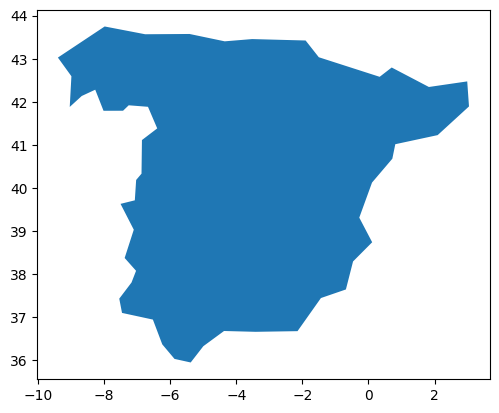

In [4]:
spain = world[world['SOV_A3']=='ESP']
spain.plot()

In [5]:
#define the grid of the raster 
dd = 1.
longitude = np.arange(-11.,5.+dd,dd)
latitude = np.arange(45.,33.+dd,-1*dd)
latitude

array([45., 44., 43., 42., 41., 40., 39., 38., 37., 36., 35.])

In [7]:
#define the transformation

min_lon = longitude.min()
max_lat = latitude.max()
reslon  = longitude[1]-longitude[0]
reslat = latitude[1]-latitude[0]
height, width = latitude.shape[0], longitude.shape[0]

transform = Affine.translation(longitude.min(), latitude.max()) * Affine.scale(reslon, reslat)


In [8]:
# Convert geometries to the rasterio format
shapes = [geom for geom in spain.geometry]

# Create a mask, see https://rasterio.readthedocs.io/en/latest/api/rasterio.features.html
#pixel center is in polygon
maskC = geometry_mask(shapes, transform=transform, invert=True, 
                     out_shape=(height, width),all_touched=True).astype(np.uint8)
#pixel that overlap with polygon
maskA = geometry_mask(shapes, transform=transform, invert=True, 
                     out_shape=(height, width),all_touched=False).astype(np.uint8)


<Axes: >

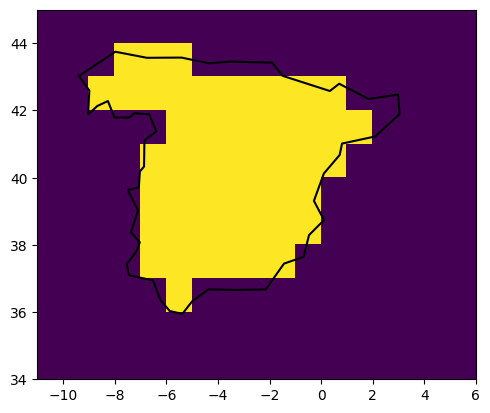

In [10]:
ax = plt.subplot(111)
ax.pcolor(longitude+dd/2, latitude-dd/2, (maskA) )
spain.boundary.plot(ax=ax,color='k')